In [1]:
from sklearn.model_selection import train_test_split
from rnn import *

In [2]:
train_data_path = "domain1_train.json"
test_train_path = "test_set.json"

In [3]:
texts, label, max_length = padding_dataset(read_data(train_data_path))

In [4]:

# Assuming your data is in the format:
# data = [{"text": [sequence], "label": label}, ...]

# Split the data and labels

# Split data
X_train, X_val, y_train, y_val = train_test_split(texts, label, test_size=0.2, random_state=42)

# If you want to keep the format [{"text": [sequence], "label": label}, ...]:
train_data = [{"text": text, "label": label} for text, label in zip(X_train, y_train)]
val_data = [{"text": text, "label": label} for text, label in zip(X_val, y_val)]


In [5]:
model = create_model(50)
history = train_model(model, X_train, y_train, X_val, y_val)

Epoch 1/10


2023-09-08 16:29:41.961504: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


488/488 [==============================] - 44s 86ms/step - loss: 0.2471 - accuracy: 0.9037 - val_loss: 0.1613 - val_accuracy: 0.9444
Epoch 2/10
488/488 [==============================] - 42s 85ms/step - loss: 0.1165 - accuracy: 0.9592 - val_loss: 0.1458 - val_accuracy: 0.9515
Epoch 3/10
488/488 [==============================] - 42s 86ms/step - loss: 0.0781 - accuracy: 0.9741 - val_loss: 0.1449 - val_accuracy: 0.9536
Epoch 4/10
488/488 [==============================] - 42s 86ms/step - loss: 0.0505 - accuracy: 0.9847 - val_loss: 0.1466 - val_accuracy: 0.9544
Epoch 5/10
488/488 [==============================] - 42s 85ms/step - loss: 0.0296 - accuracy: 0.9901 - val_loss: 0.1722 - val_accuracy: 0.9554
Epoch 6/10
488/488 [==============================] - 41s 83ms/step - loss: 0.0411 - accuracy: 0.9861 - val_loss: 0.1853 - val_accuracy: 0.9541
Epoch 7/10
488/488 [==============================] - 41s 84ms/step - loss: 0.0141 - accuracy: 0.9956 - val_loss: 0.1917 - val_accuracy: 0.9546
Epo

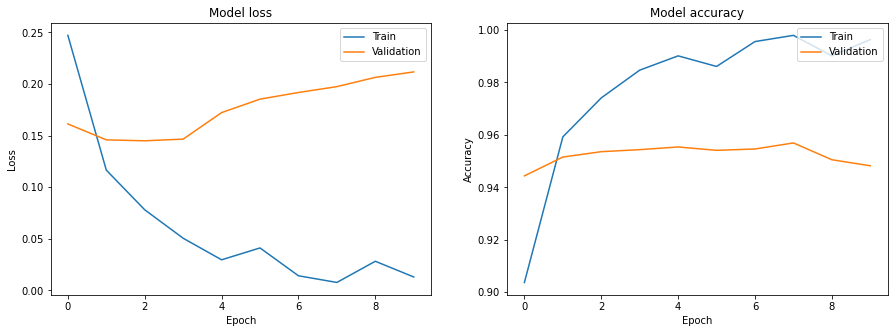

In [6]:
plot_learning_curve(history)

In [9]:
test_data = read_data(test_train_path)
predictions = predict(model, test_data, max_length,)
covert_res_to_csv(predictions, filename="RNN_50")

32/32 [==============================] - 1s 17ms/step


TypeError: covert_res_to_csv() missing 1 required positional argument: 'filename'

In [55]:
from cnn import *
from tensorflow.keras.preprocessing.sequence import pad_sequences


data = read_data(train_data_path)

texts = [item["text"] for item in data]
labels = [item["label"] for item in data]

texts_padded = pad_sequences(texts, padding='post')

X_train, X_val, y_train, y_val = train_test_split(texts_padded, labels, test_size=0.2, random_state=42)

# Convert to numpy arrays
X_train = np.array(X_train)
X_val = np.array(X_val)
y_train = np.array(y_train)
y_val = np.array(y_val)

# # Model definition
vocab_size = 5000
embedding_dim = 128
sequence_length = texts_padded.shape[1]

cnn_model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=sequence_length),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid') 
])
cnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = train_CNN(cnn_model, X_train, y_train, X_val, y_val)

Epoch 1/10
373/373 [==============================] - 20s 53ms/step - loss: 0.4059 - accuracy: 0.8562 - val_loss: 0.3870 - val_accuracy: 0.8534
Epoch 2/10
373/373 [==============================] - 21s 55ms/step - loss: 0.3318 - accuracy: 0.8652 - val_loss: 0.3804 - val_accuracy: 0.8520
Epoch 3/10
373/373 [==============================] - 19s 51ms/step - loss: 0.1716 - accuracy: 0.9371 - val_loss: 0.5654 - val_accuracy: 0.8554
Epoch 4/10
373/373 [==============================] - 19s 51ms/step - loss: 0.0372 - accuracy: 0.9904 - val_loss: 0.6206 - val_accuracy: 0.8282
Epoch 5/10
373/373 [==============================] - 20s 53ms/step - loss: 0.0059 - accuracy: 0.9993 - val_loss: 0.7836 - val_accuracy: 0.8419
Epoch 6/10
373/373 [==============================] - 20s 54ms/step - loss: 0.0018 - accuracy: 0.9998 - val_loss: 0.9022 - val_accuracy: 0.8477
Epoch 7/10
373/373 [==============================] - 20s 54ms/step - loss: 9.6001e-04 - accuracy: 0.9998 - val_loss: 0.9598 - val_accur

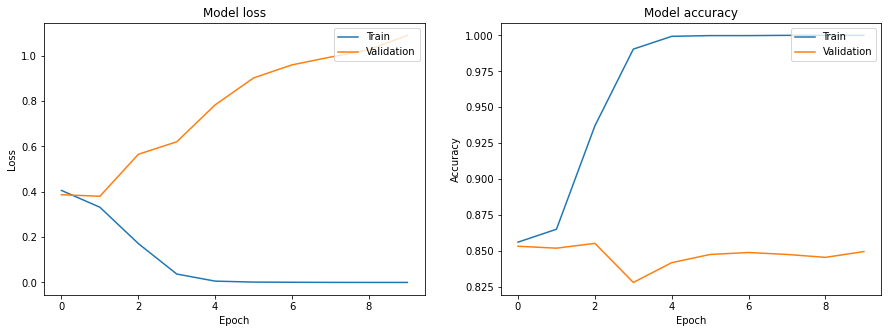

In [56]:
plot_learning_curve(history)

In [51]:
test_data = read_data(test_train_path)
test_texts = [item["text"] for item in test_data]
texts_padded = pad_sequences(test_texts, padding='post')

predictions = model.predict(texts_padded)
covert_res_to_csv(predictions)

32/32 [==============================] - 0s 11ms/step
